Este colab fue desarrollado por Arnold Charry Armero.

# Newsvendor Model - El Modelo del Vendedor de Periódicos (Demanda Probabilística)

A diferencia de los modelos anteriores que se basaban en una demanda determínistica, este modelo abre la puerta a un análisis de demanda estocástica (probabilística); esto es, a un análisis en el que no se tiene total certeza de cuánto pedirá el cliente. Por lo tanto, se convierte en un problema de optimización; minimizar la probabilidad de tener tanto faltantes como excedentes. En este modelo se tiene un número de unidades faltantes y excedentes. Se busca minimizar los costos asociados a estas unidades. Los parámetros se definen de la siguiente manera:

$ π = \mathrm{Costo \:unitario \: de \: faltantes} $

$ c_{0} = \mathrm{Costo \: unitario \: de \: excedentes} $

$ D = \mathrm{Demanda \:durante \: el \: periodo} $

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ f(D) = \mathrm{Función \:de \: densidad \: de\: probabilidad} $

$ f(Q) = \mathrm{Probabilidad \:de \: ocurrencia \: del \: lote\:}Q $

Y definiendo los costos,

$ \mathrm{Costo \:esperado \: de \: excedentes} = f(Q)c_{0}$

$ \mathrm{Costo \:esperado \: de \: faltantes} = \left [ 1 - f(Q) \right ]\pi $

Los valores óptimos ocurren cuando los costos esperados de excedentes y faltantes son iguales, lo que conduce a la razón crítica que se muestra a continuación:

$$ f(Q)c_{0} = \left [ 1 - f(Q) \right ]\pi $$

Despejando $f(Q)$,

$$ RC = f(Q^{*}) = \frac{\pi}{\pi+c_{0}}$$

Ahora se continúa con la resolución de tres ejemplos, uno con probabilidad discreta y los otros dos con probabilidad continua.

## Fundamentos de Probabilidad

En el modelo del vendedor de periódicos hay dos enfoques dependiendo de la naturaleza de la variable aleatoria. Por un lado, para variables aleatorias discretas se emplea una tabla de probabilidades, se piensa en una probabilidad específica y en dado caso se toma el valor que esté más cercano a la tabla. Por otro lado, para variables aleatorias continuas se piensa en la probabilidad acumulada (densidad) de que un evento suceda.

**Observación:** Para variables aleatorias continuas en el modelo del vendedor de periódicos, se utilizan mayormente dos distribuciones: La Distribución de Probabilidad Uniforme y La Distribución de Probabilidad Normal. Sin embargo, siempre y cuando se tenga la función de densidad de la distribución, se puede realizar el mismo análisis con cualquier distribución de probabilidad que se ajuste a un conjunto de datos determinado.

## Variables Aleatorias Discretas

### Registro de Tabla de Probabilidades

Por lo general, siempre se entrega una tabla de probabilidades que determinan la frecuencia relativa de que suceda un evento númerico. Para calcular el valor esperado (media) con demanda estocástica se utiliza la siguiente ecuación:

$$ \mu = \sum_{i=1}^{n}D_{i}f(D_{i}) $$

Y la desviación estándar se calcula como sigue,

$$ \sigma = \sqrt{\sum_{i = 1}^{n}\left [ \left ( D_{i} - \mu  \right )^{2} f(D_{i}) \right ]} $$

Ahora se continua con la implementación en código resolviendo el siguiente ejemplo.

**Ejemplo 6-16. Decisiones de una sola vez.** La señora Kandell ha estado en el negocio de árboles
de Navidad durante años. Ella lleva un registro del volumen de ventas por año y ha elaborado una tabla de la demanda de estos árboles y su probabilidad. Es evidente que la demanda nunca
fue menor que 22 árboles ni mayor que 36.

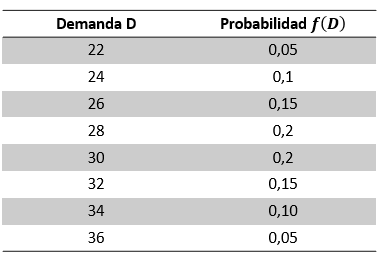

**Ejemplo 6-16 (continuación).** **Decisiones de una sola vez.** La señora Kandell estima que si com
pra más árboles de los que puede vender, le cuesta alrededor de $\$40$ por el árbol y por deshacerse de
éste. Si la demanda es más alta que el número de árboles que ordena, pierde su ganancia de $\$40$ por
árbol.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se sube la tabla de probabilidades
df = pd.read_excel('/content/drive/MyDrive/Operations I/Discrete Newsvendor Model.xlsx')
df.head(8)

,Demanda D,Probabilidad f(D)
0,22,0.05
1,24,0.10
2,26,0.15
3,28,0.20
4,30,0.20
5,32,0.15
6,34,0.10
7,36,0.05


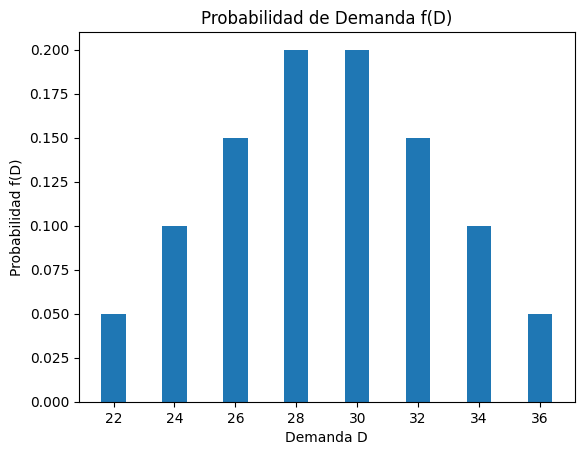

In [4]:
plt.bar(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel("Demanda D")
plt.ylabel("Probabilidad f(D)")
plt.title("Probabilidad de Demanda f(D)")
plt.show()

In [8]:
#Se obtiene la probabilidad acumulada
den_prob = []
den = 0
for i in range(df.shape[0]):
  den += df.iloc[i, 1]
  den_prob.append(den)

df.insert(loc = 2, column = "Probabilidad acumulada", value = den_prob)
df

,Demanda D,Probabilidad f(D),Probabilidad acumulada
0,22,0.05,0.05
1,24,0.10,0.15
2,26,0.15,0.30
3,28,0.20,0.50
4,30,0.20,0.70
5,32,0.15,0.85
6,34,0.10,0.95
7,36,0.05,1.00


In [9]:
#Se define la Razón Crítica
def critical_reason(c0, pi):
  """
  Calcula la razón crítica de una
  distribución de probabilidad

  Args:
    c0: Costo unitario de
    excedentes.
    pi: Costo unitario de
    faltantes.

  Returns:
    RC: Razón crítica (Probabilidad)
  """
  return pi / (pi + c0)

In [150]:
#Parámetros
pi = 40
c0 = 40

In [152]:
RC = critical_reason(pi, c0)
print(f"La razón crítica es de {critical_reason(pi, c0)}")

La razón crítica es de 0.5


Ahora se busca en la tabla cuál es la cantidad para la probabilidad de 0.5

In [153]:
df[df['Probabilidad acumulada'] == RC]

,Demanda D,Probabilidad f(D),Probabilidad acumulada
3,28,0.2,0.5


In [154]:
Q = df.iloc[3, 0]
print(f"La cantidad óptima es {Q} unidades")

La cantidad óptima es 28 unidades


Lo cual nos permite saber que la cantidad óptima es $Q^{*} = 28$. Ahora, con este dato, se calcula el costo esperado de faltantes y el costo esperado de excedentes.

$ \mathrm{Costo \:esperado \: de \: excedentes} = f(Q)c_{0}$

$ \mathrm{Costo \:esperado \: de \: faltantes} = \left [ 1 - f(Q) \right ]\pi $

In [136]:
#Costo esperado de excedentes
surplus_cost = critical_reason(0.4, 0.4) * 40
print(f"El costo de excedentes es ${surplus_cost}.")

#Costo esperado de faltantes
shortage_cost = (1 - critical_reason(0.4, 0.4)) * 40
print(f"El costo de faltantes es ${shortage_cost}.")

El costo de excedentes es $20.0.
El costo de faltantes es $20.0.


Es importante destacar que para calcular el número de unidades faltantes y el número de unidades excedentes en un problema con variables aleatorias discretas se debe hacer una sumatoria como sigue,

$$ K(Q) = c_{0} \text{ max } \left \{ Q - D, \: 0 \right \} + π\text{ max } \left \{ D - Q, \: 0 \right \}$$

$$ E(K(Q)) = c_{0} \sum_{i = 1}^{i^{*}}(Q - D_{i}) f(D_{i}) + \pi \sum_{i = i^{*}}^{n}(D_{i} - Q) f(D_{i})$$

Se va a calcular el valor esperado para los excedentes,

$$ \sum_{i = 1}^{i^{*}}(Q - D_{i}) f(D_{i}) $$

donde $i^{*}$ es la posición del $Q^{*}$ dentro de los datos.

In [147]:
#Vimos que el óptimo está en la fila 3
exc = 0
for i in range(4):
  exc += (Q - df.iloc[i, 0]) * df.iloc[i, 1]

print(f"El número de unidades excedentes esperadas es de {exc}")

El número de unidades excedentes esperadas es de 1.0


Se va a calcular el valor esperado para los faltantes,

$$ \sum_{i = i^{*}}^{n}(D_{i} - Q) f(D_{i}) $$

donde $i^{*}$ es la posición del $Q^{*}$ dentro de los datos.

In [149]:
#Vimos que el óptimo está en la fila 3
fal = 0
for i in range(4, df.shape[0]):
  fal += (df.iloc[i, 0] - Q) * df.iloc[i, 1]

print(f"El número de unidades faltantes esperados es de {fal}")

El número de unidades faltantes esperados es de 2.0


Ahora se procede a calcular el costo esperado,

$$ E(K(Q)) = c_{0} \sum_{i = 1}^{i^{*}}(Q - D_{i}) f(D_{i}) + \pi \sum_{i = i^{*}}^{n}(D_{i} - Q) f(D_{i})$$

$$ E(K(Q)) = (40)(1)  + (40) (2)$$

$$ E(K(Q)) = \$120$$

In [155]:
#Calculo del costo
K = c0 * round(exc) + pi * round(fal)
print(f"El costo esperado es de ${K}")

El costo esperado es de $120


Ahora calculando las utilidades esperadas,

$$ E\left \{ \text{Ganancia} \right \} = Q^{*}\pi - K(Q^{*}) $$

$$ E\left \{ \text{Ganancia} \right \} = (28)(40) - (120) $$

$$ E\left \{ \text{Ganancia} \right \} = \$1000 $$

In [156]:
G = round(Q) * pi - K
print(f"La ganancia esperada es de ${G}")

La ganancia esperada es de $1000


## Variables Aleatorias Continuas

### Distribución de Probabilidad Uniforme

Recuerde que la Distribución de Probabilidad Uniforme se caracteriza por tener forma rectangular y quedar definida por los valores mínimos y máximos. Todos los elementos dentro del invervalo tienen la misma probabilidad de ocurrencia. La ecuación de la Distribución de Probabilidad Uniforme es:

$$ f(D) = \frac{1}{b - a}\$$

cumpliéndose la condición de que $a\leq D\leq d \: $  y,

$ a = \mathrm{Valor \: minimo} $

$ b = \mathrm{Valor \: maximo} $

$ D = \mathrm{Demanda} $

Representándose graficamente,

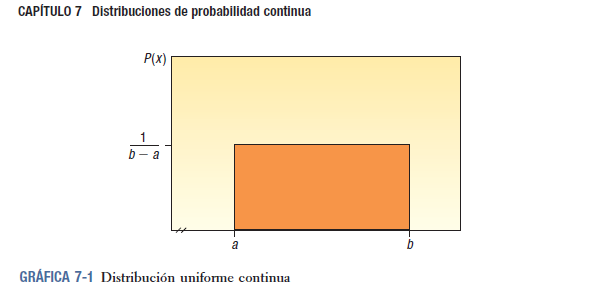


La formulación matemática del modelo del vendedor de periódicos para el caso continuo es la siguiente,

$ \mathrm{Posición \: del \: excedente}$

$$ Q - D \:\:\:\text{si } \:\: D < Q$$

es decir,

$$ \text{ max } \left \{ Q - D, \: 0 \right \} =\begin{cases}
Q - D & \text{ si } Q > D \\
0 & \text{ si } Q \leq D
\end{cases} $$

$ \mathrm{Posición \: del \: faltante}$

$$ D - Q \:\:\:\text{si } \:\: D > Q$$

es decir,

$$ \text{ max } \left \{ D - Q, \: 0 \right \} =\begin{cases}
0 & \text{ si } Q \geq
 D \\
D - Q & \text{ si } Q < D
\end{cases} $$

Dando un valor esperado de costo,

$$ K(Q) = c_{0} \text{ max } \left \{ Q - D, \: 0 \right \} + π\text{ max } \left \{ D - Q, \: 0 \right \}$$

$$ E(K(Q)) = c_{0} \int_{0}^{Q^{*}}(Q - D) f(D) \: dD + \pi \int_{Q^{*}}^{\infty}(D - Q) f(D) \: dD $$

Para ilustrar de mejor manera lo anterior, se resolverán dos ejercicios. Uno con una distribución uniforme y otro con una distribución normal.

**Ejemplo 6-17. Decisión de una sola vez: versión continua.** Los estudiantes de último año planean
vender camisetas para recaudar dinero destinado a la conferencia regional. Se supone que la demanda
de camisetas es igualmente probable para cualquier número entre 48 y 72. Cada camiseta
cuesta $\$3.50$ y se venderá en $\$5.00$. Si no se compran suficientes camisetas, el único costo será la ganancia
perdida. Como estas camisetas tienen el logo de la conferencia, se piensa que las que no se
vendan antes del evento se podrán vender a $\$2.50$. Debido al alto costo de preparación sólo se puede
hacer un pedido. Calcule el costo esperado.

Primero, se identifica la función de probabilidad de distribución uniforme como,

$$ f(D) = \frac{1}{72 - 48}\ $$

$$ f(D) = \frac{1}{24}\ $$

In [117]:
#Se definen las funciones
def f(D):
  return 1 / (72 - 48)
PV = 5
c = 3.5
pi = PV - c
r = 2.5
c0 = c - r
RC = critical_reason(c0, pi)
print(f"La razón crítica es {RC}")

La razón crítica es 0.6


Dando para el análisis,

$$ f(Q^{*}) = \int_{48}^{Q^{*}}\frac{1}{24}\: dD\ = 0.6 $$

$$ \frac{Q^{*}-48}{24}=0.6 $$

Despejando $Q^{*}$,

$$ Q^{*} = 62.4 $$

Se ve esto implementado en código,

In [121]:
def uniform_integral(a, b, RC):
  return RC * (b - a) + a

Q = round(uniform_integral(48, 72, RC))
print(f"El valor esperado es de {Q} unidades")

El valor esperado es de 62 unidades


Ahora se continúa con el número de camisetas no vendidas (excedentes),

$$\int_{48}^{Q^{*}}(Q - D) f(D) \: dD = \int_{48}^{62}(62 - D) \frac{1}{24} \: dD$$

In [122]:
#Resolviendo la integral
def f(D):
  return (Q - D) * (1/24)


def solve(a, Q):
  prob = quad(f, a, Q)[0]
  return prob

exc = solve(48, 62)
print(f"El número esperado de excedentes es de {round(exc)} unidades")

El número esperado de excedentes es de 4 unidades


Ahora se continúa con el número de camisetas que faltaron (faltantes),

$$ \int_{Q^{*}}^{\infty}(D - Q) f(D) \: dD= \int_{62}^{72}(D - 62) \frac{1}{24} \: dD$$

In [123]:
#Resolviendo la integral
def f(D):
  return (D - Q) * (1/24)

def solve(Q, b):
  prob = quad(f, Q, b)[0]
  return prob

fal = solve(62, 72)
print(f"El número esperado de faltantes es de {round(fal)} unidades")

El número esperado de faltantes es de 2 unidades


Ahora se procede a calcular el costo esperado,

$$ E(K(Q)) = c_{0} \int_{0}^{Q^{*}}(Q - D) f(D) \: dD + \pi \int_{Q^{*}}^{\infty}(D - Q) f(D) \: dD $$

$$ E(K(Q)) = 1 \int_{48}^{62}(62 - D) \frac{1}{24} \: dD  + 1.5 \int_{62}^{72}(D - 62) \frac{1}{24} \: dD$$

$$ E(K(Q)) = (1) (4)  + (1.5) (2)$$

$$ E(K(Q)) = \$7$$

Se hace lo mismo en código,

In [124]:
#Calculo del costo
K = c0 * round(exc) + pi * round(fal)
print(f"El costo esperado es de ${K}")

El costo esperado es de $7.0


Ahora calculando las utilidades esperadas,

$$ E\left \{ \text{Ganancia} \right \} = Q^{*}\pi - K(Q^{*}) $$

$$ E\left \{ \text{Ganancia} \right \} = (62)(1.5) - (7) $$

$$ E\left \{ \text{Ganancia} \right \} = \$86 $$

In [125]:
G = round(Q) * pi - K
print(f"La ganancia esperada es de ${G}")

La ganancia esperada es de $86.0


### Distribución de Probabilidad Normal

La Distribución de Probabilidad Normal es probablemente la distribución continua más importante tanto en estadística teórica como aplicada. Esta es una distribución que refleja muy bien como la mayoría de datos se concentran sobre la media de la población. Su forma es de campana (conocida como Campana de Gauss) y es simétrica. La ecuación de la Distribución de Probabilidad Normal es la siguiente:


$$ f(D)= \frac{1}{\sigma \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-\mu}{\sigma } \right )^{2}} $$

Donde,

$ \mu = \mathrm{Media} $

$ \sigma  = \mathrm{Desviacion\: Estandar} $

$ D = \mathrm{Demanda} $


Representándose graficamente,


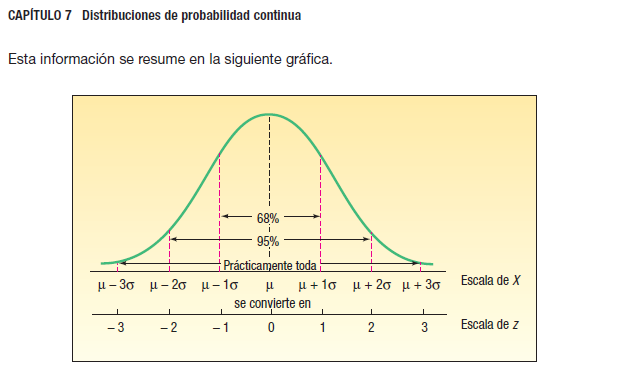

**Nota:** Para efectos prácticos, en este notebook de Python se utilizarán integrales númericas con el módulo scipy para no tener la necesidad de emplear tablas.

**Ejemplo tipo Parcial.** Un panadero vende avena en su local principal. La demanda diaria de avena es una variable aleatoria con una distribución aproximadamente Normal con media de 35 litros y una desviación estándar de 3 litros. El costo de producción por litro de avena es de $\$2000$. El vaso de avena tiene un precio de venta al público de $\$2000$. Un litro de avena rinde 4 vasos. La avena que no se venda en el día se le vende a una fundación de caridad a $\$60$/vaso. Responda las siguientes preguntas.

1. ¿Cuántos litros de avena debe producir el panadero diariamente?
2. ¿Cuál es el costo esperado de faltantes?
3. ¿Cuál es el costo esperado de excedentes?
4. ¿Cuál es la utilidad esperada?

Primero, se deben convertir los litros a vasos ya que estos últimos son el producto que se va a comercializar,

In [126]:
#Párametros
mu = 35 * 4
sigma = 3 * 4
c = 2000 / 4
PV = 2000
pi = PV - c
r = 60
c0 = c - r

Segundo, se identifica la función de probabilidad de distribución normal como,

$$ f(D)= \frac{1}{12 \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-140}{12 } \right )^{2}} $$


In [127]:
#Se definen las funciones
def f(D):
  """
  Función de densidad de la
  Distribución Normal

  Args:
    D: Demanda aleatoria

  Returns:
    f(D): Probabilidad de
    ocurrencia
  """
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp((-1/2) * ((D - mu) / sigma)**2)

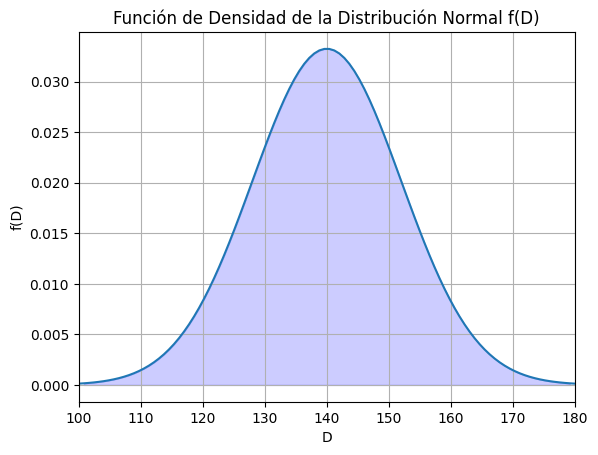

In [128]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(100, 180, 100)
y = [f(D) for D in x]
plt.grid()
plt.title("Función de Densidad de la Distribución Normal f(D)")
plt.xlim(100, 180)
plt.xlabel('D')
plt.ylabel('f(D)')
plt.fill_between(
        x = x,
        y1= f(x),
        where= (100 < x)&(x < 180),
        color= "b",
        alpha= 0.2)
plt.plot(x, y)

In [129]:
#Se halla la razón crítica
RC = critical_reason(c0, pi)
print(f"La razón crítica es {RC}")

La razón crítica es 0.7731958762886598


Dando para el análisis,

$$ f(Q^{*}) = \int_{0}^{Q^{*}}\frac{1}{12 \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-140}{12 } \right )^{2}} \: dD\ = 0.773 $$

Debido a que despejar $Q$ se vuelve realmente complejo, se va a utilizar la función inversa de la distribución normal estándar para obtenerlo en este caso. $Q^{*}$ se halla utilizando el valor $z$ de la distribución normal estándar. Reescribiendo,


$$ \frac{Q^{*}-\mu}{σ}= z $$

$$ \frac{Q^{*}-140}{12}= z $$

In [130]:
#Para ello importamos el módulo de estadísticas
#de Scipy
import scipy.stats as st
z = st.norm.ppf(RC)
print(f"El valor de z es de {z}")

El valor de z es de 0.7494131169872412


Quedando,

$$ \frac{Q^{*}-140}{12} = 0.75 $$

Despejando $Q^{*}$,

$$ Q^{*} = 149 $$

Se ve esto implementado en código,

In [131]:
def normal_integral(mu, sigma, z):
  return z * sigma + mu

Q = round(normal_integral(140, 12, RC))
print(f"El valor esperado es de {Q} unidades (vasos)")

#En litros sería
l = Q / 4
print(f"El valor esperado es de {l} unidades (litros)")

El valor esperado es de 149 unidades (vasos)
El valor esperado es de 37.25 unidades (litros)


Ahora se continúa con el número de vasos no vendidos (excedentes),

$$\int_{0}^{Q^{*}}(Q - D) f(D) \: dD = \int_{0}^{149}(149 - D) \frac{1}{12 \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-140}{12 } \right )^{2}} dD$$

In [132]:
#Resolviendo la integral
def f(D):
  return (Q - D) * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp((-1/2) * ((D - mu) / sigma)**2)

def solve(a, Q):
  prob = quad(f, a, Q)[0]
  return prob

exc = solve(0, 149)
print(f"El número esperado de excedentes es de {round(exc)} unidades")

El número esperado de excedentes es de 11 unidades


Se grafica,

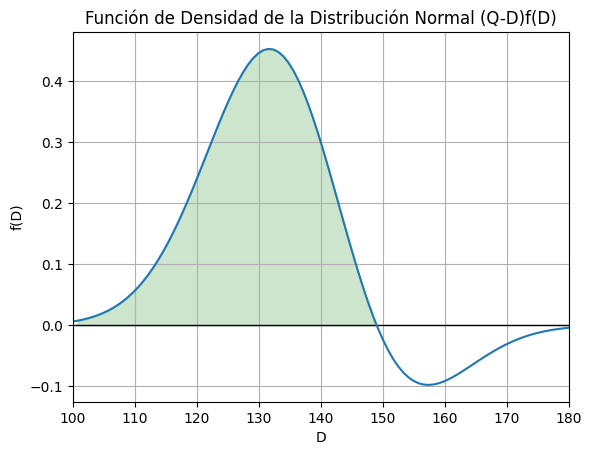

In [133]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(100, 180, 100)
y = [f(D) for D in x]
plt.grid()
plt.title("Función de Densidad de la Distribución Normal (Q-D)f(D)")
plt.xlim(100, 180)
plt.xlabel('D')
plt.ylabel('f(D)')
plt.axhline(linewidth=1, color='black')
plt.fill_between(
        x = x,
        y1= f(x),
        where= (100 < x)&(x < 149),
        color= "g",
        alpha= 0.2)
plt.plot(x, y)

Ahora se continúa con el número de camisetas que faltaron (faltantes),

$$ \int_{Q^{*}}^{\infty}(D - Q) f(D) \: dD= \int_{149}^{\infty}(D - 149) \frac{1}{12 \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-140}{12 } \right )^{2}} dD$$

In [134]:
#Resolviendo la integral
def f(D):
  return (D - Q) * (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp((-1/2) * ((D - mu) / sigma)**2)

def solve(Q, b):
  prob = quad(f, Q, b)[0]
  return prob

fal = round(solve(149, np.inf))
print(f"El número esperado de faltantes es de {round(fal)} unidades")

El número esperado de faltantes es de 2 unidades


Se grafica,

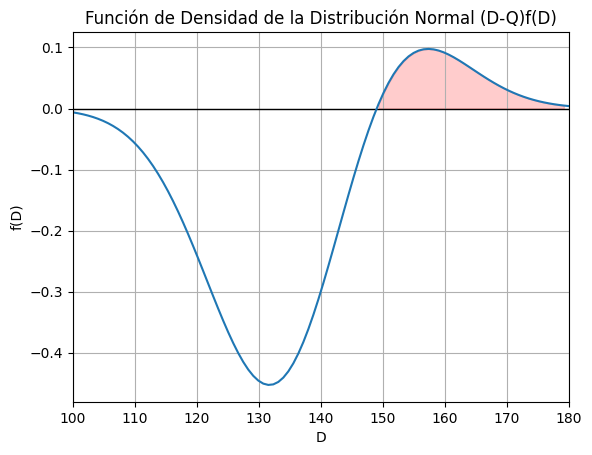

In [135]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(100, 180, 100)
y = [f(D) for D in x]
plt.grid()
plt.title("Función de Densidad de la Distribución Normal (D-Q)f(D)")
plt.xlim(100, 180)
plt.xlabel('D')
plt.ylabel('f(D)')
plt.axhline(linewidth=1, color='black')
plt.fill_between(
        x = x,
        y1= f(x),
        where= (149 < x)&(x < 180),
        color= "r",
        alpha= 0.2)
plt.plot(x, y)

Ahora se calculan el costo esperado de faltantes y el costo esperado de excedentes,

$ \mathrm{Costo \:esperado \: de \: excedentes} = f(Q)c_{0}$

$ \mathrm{Costo \:esperado \: de \: faltantes} = \left [ 1 - f(Q) \right ]\pi $

In [138]:
#Costo esperado de excedentes
surplus_cost = RC * c0
print(f"El costo de excedentes es ${surplus_cost}.")

#Costo esperado de faltantes
shortage_cost = (1 - RC) * pi
print(f"El costo de faltantes es ${shortage_cost}.")

El costo de excedentes es $340.2061855670103.
El costo de faltantes es $340.20618556701027.


$$ E(K(Q)) = c_{0} \int_{0}^{Q^{*}}(Q - D) f(D) \: dD + \pi \int_{Q^{*}}^{\infty}(D - Q) f(D) \: dD $$

$$ E(K(Q)) = 440 \int_{0}^{149}(149 - D) \frac{1}{12 \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-140}{12 } \right )^{2}} dD + 1500 \int_{149}^{\infty}(D - 149) \frac{1}{12 \sqrt{2\pi }} e^{\frac{-1}{2} \left ( \frac{D-140}{12 } \right )^{2}} dD$$

$$ E(K(Q)) = (440) (11)  + (1500) (2)$$

$$ E(K(Q)) = \$7840$$

In [139]:
#Calculo del costo
K = c0 * round(exc) + pi * round(fal)
print(f"El costo esperado es de ${K}")

El costo esperado es de $7840.0


Ahora calculando las utilidades esperadas,

$$ E\left \{ \text{Ganancia} \right \} = Q^{*}\pi - K(Q^{*}) $$

$$ E\left \{ \text{Ganancia} \right \} = (149)(1500) - (7840) $$

$$ E\left \{ \text{Ganancia} \right \} = \$215660 $$

In [140]:
G = round(Q) * pi - K
print(f"La ganancia esperada es de ${G}")

La ganancia esperada es de $215660.0


De esta manera queda concluido el modelo del vendedor de periódicos.

#### Referencias
*   Pulido, H. G. (2007). Control estadístico de calidad y Seis Sigma.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.